In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
print(cancer.data.shape)
print(cancer.target.shape)

(569, 30)
(569,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=11)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
predicted = knn.predict(X=X_test)
expected = y_test
print(predicted[:20])
print(expected[:20])
print(f'{knn.score(X_test, y_test):.2%}')

[0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0]
[0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0]
94.41%


In [6]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print(confusion)

[[43  7]
 [ 1 92]]


In [7]:
from sklearn.metrics import classification_report
names = [str(value) for value in cancer.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.86      0.91        50
      benign       0.93      0.99      0.96        93

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



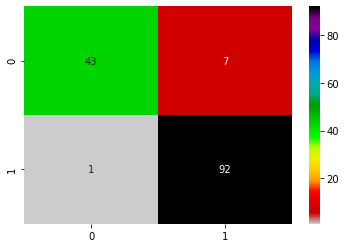

In [8]:
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))
import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=cancer.data, y=cancer.target, cv=kfold)
print(scores)
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

[0.92982456 0.94736842 0.89473684 0.92982456 0.92982456 0.94736842
 0.89473684 0.94736842 0.94736842 0.91071429]
Mean accuracy: 92.79%
Accuracy standard deviation: 2.01%


In [11]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000)
}

for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=cancer.data, y=cancer.target, cv=kfold)
  print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%


LogisticRegression gives the best accuracy